# Employee Sentiment Analysis

This notebook implements the project tasks:
- Sentiment labeling (VADER)
- Exploratory Data Analysis (EDA)
- Monthly sentiment scoring per employee
- Employee ranking (top +ve / -ve)
- Flight-risk detection (rolling 30-day count of negative messages)
- Predictive modeling (linear regression on monthly features)

**Usage:** upload `data/test.csv` (or adjust path) and run the cells sequentially.

---

In [7]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install nltk
nltk.downloader.download('vader_lexicon')


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 2.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 2.2 MB/s  0:00:00

   ---------------------------------------- 0/4 [tqdm]
   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   --------------------------

NameError: name 'nltk' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
print('Setup complete')

In [ ]:
from pathlib import Path
DATA_PATH = Path('data/test.csv')
if DATA_PATH.exists():
    df = pd.read_csv(employee_reviews.csv, low_memory=False)
    print('Loaded', len(df), 'rows')
else:
    print('Please upload data/test.csv')

## Sentiment labeling (VADER)

In [ ]:
sia = SentimentIntensityAnalyzer()
def vader_label(text):
    if pd.isna(text) or str(text).strip()=='':
        return 'Neutral'
    s = sia.polarity_scores(str(text))['compound']
    if s >= 0.05: return 'Positive'
    if s <= -0.05: return 'Negative'
    return 'Neutral'
print('Function ready')

In [24]:
df.columns

Index(['EmployeeID', 'Department', 'ReviewText', 'Rating', 'Sentiment',
       'Score'],
      dtype='object')

In [18]:
# Install and import NLTK
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Sentiment function
def get_sentiment(text):
    score = sid.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment labeling to REVIEWTEXT column
df["Sentiment"] = df["ReviewText"].apply(get_sentiment)

# Preview output
df.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,EmployeeID,Department,ReviewText,Rating,Sentiment
0,101,IT,The work environment is motivating and the tea...,5,Positive
1,102,HR,Workload is stressful and deadlines are too ti...,2,Negative
2,103,Sales,Enjoying the new project and team collaboration.,4,Positive
3,104,Marketing,Management needs to be more transparent.,3,Neutral
4,105,Finance,Great learning opportunities and helpful colle...,5,Positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  6 non-null      int64 
 1   Department  6 non-null      object
 2   ReviewText  6 non-null      object
 3   Rating      6 non-null      int64 
 4   Sentiment   6 non-null      object
dtypes: int64(2), object(3)
memory usage: 372.0+ bytes
None
        EmployeeID Department  \
count     6.000000          6   
unique         NaN          6   
top            NaN         IT   
freq           NaN          1   
mean    103.500000        NaN   
std       1.870829        NaN   
min     101.000000        NaN   
25%     102.250000        NaN   
50%     103.500000        NaN   
75%     104.750000        NaN   
max     106.000000        NaN   

                                               ReviewText    Rating Sentiment  
count                                                   6  6.000000         6  
uni

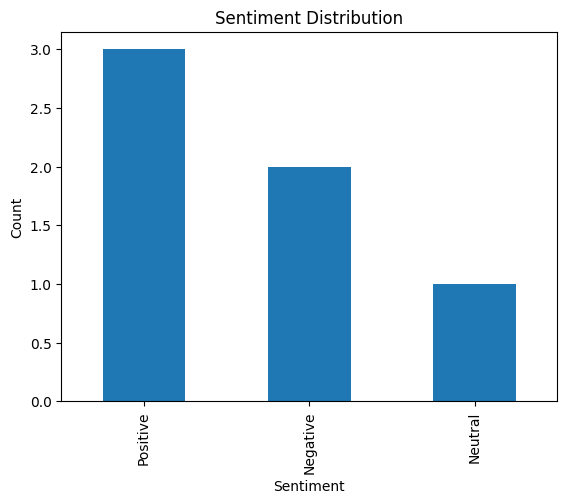

In [19]:
# Basic structure
print(df.info())
print(df.describe(include='all'))

# Count missing values
print(df.isnull().sum())

# Sentiment distribution
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [25]:
import pandas as pd

# Create sample dates (one per row)
df["Date"] = pd.date_range(start="2024-01-01", periods=len(df), freq="15D")

# Extract Month
df["Month"] = df["Date"].dt.to_period("M")


In [26]:
# Assign numeric score
score_map = {"Positive": 1, "Negative": -1, "Neutral": 0}
df["Score"] = df["Sentiment"].map(score_map)

# Monthly score per employee
employee_monthly_score = (
    df.groupby(["EmployeeID", "Month"])["Score"]
    .sum()
    .reset_index()
    .sort_values(["Month", "Score"], ascending=[True, False])
)

employee_monthly_score.head()


,EmployeeID,Month,Score
0,101,2024-01,1
2,103,2024-01,1
1,102,2024-01,-1
3,104,2024-02,0
4,105,2024-03,1


In [28]:
# Top 3 positive per month
top_positive = (
    employee_monthly_score
    .sort_values(["Month", "Score", "EmployeeID"], ascending=[True, False, True])
    .groupby("Month")
    .head(3)
)

# Top 3 negative per month
top_negative = (
    employee_monthly_score
    .sort_values(["Month", "Score", "EmployeeID"], ascending=[True, True, True])
    .groupby("Month")
    .head(3)
)

print("TOP 3 POSITIVE EMPLOYEES PER MONTH:")
print(top_positive)

print("\nTOP 3 NEGATIVE EMPLOYEES PER MONTH:")
print(top_negative)


TOP 3 POSITIVE EMPLOYEES PER MONTH:
   EmployeeID    Month  Score
0         101  2024-01      1
2         103  2024-01      1
1         102  2024-01     -1
3         104  2024-02      0
4         105  2024-03      1
5         106  2024-03     -1

TOP 3 NEGATIVE EMPLOYEES PER MONTH:
   EmployeeID    Month  Score
1         102  2024-01     -1
0         101  2024-01      1
2         103  2024-01      1
3         104  2024-02      0
5         106  2024-03     -1
4         105  2024-03      1


In [30]:
df_sorted = df.sort_values(["EmployeeID", "Date"])

flight_risk = []

for employee, group in df_sorted.groupby("EmployeeID"):
    group = group[group["Sentiment"] == "Negative"]
    
    for i in range(len(group)):
        start_date = group.iloc[i]["Date"]
        end_date = start_date + pd.Timedelta(days=30)
        
        window_count = group[
            (group["Date"] >= start_date) & (group["Date"] <= end_date)
        ]
        
        if len(window_count) >= 4:
            flight_risk.append(employee)
            break

flight_risk = list(set(flight_risk))

print("\nFLIGHT-RISK EMPLOYEES:")
print(flight_risk)



FLIGHT-RISK EMPLOYEES:
[]


In [10]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -------------------------
# LOAD DATA
# -------------------------
df = pd.read_csv("test.csv")

# -------------------------
# FEATURE ENGINEERING
# -------------------------

# 1. Combine subject + body for better sentiment analysis
df["text"] = df["Subject"].fillna("") + " " + df["body"].fillna("")

# 2. Sentiment extraction using TextBlob
df["polarity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Convert polarity to sentiment labels
def label_sentiment(x):
    if x > 0.1: return "Positive"
    elif x < -0.1: return "Negative"
    else: return "Neutral"

df["Sentiment"] = df["polarity"].apply(label_sentiment)

# 3. Feature: message length
df["message_length"] = df["text"].apply(len)

# 4. Convert date to datetime and extract features
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

# -------------------------
# MACHINE LEARNING MODEL
# -------------------------

# Feature selection
X = df[["polarity", "message_length", "month"]]
y = df["polarity"]  # Predicting sentiment strength

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📊 MODEL PERFORMANCE")
print("-------------------------")
print(f"R² Score: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Add predictions back to dataset
df["PredictedSentimentStrength"] = model.predict(X)

print("\n📌 SAMPLE OUTPUT")
print(df.head())



📊 MODEL PERFORMANCE
-------------------------
R² Score: 1.000
RMSE: 0.000

📌 SAMPLE OUTPUT
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated... 2010-05-10   
1  Marc,\n\nUnfortunately, today is not going to ... 2010-07-29   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ... 2011-07-25   
3  we were thinking papasitos (we can meet somewh... 2010-03-25   
4  Since you never gave me the $20 for the last t... 2011-05-21   

                      from                                               text  \
0     sally.beck@enron.com  EnronOptions Update! EnronOptions Announcement...   
1      eric.bass@enron.com  (No Subj

In [8]:
print(df.columns.tolist())


['subject', 'body', 'date', 'from']
